# Email Marketing Campaigns Optimization Model with NLP


### Jupyter Notebook 8/10

#### Importing Classes from the module `campaigns`

In [1]:
import sys
sys.path.append('..')


import warnings
warnings.filterwarnings('ignore')

# Get files
from campaigns.getinputdata import LanguageFileGetInfo, CleanCampaignsFileGetInfo

# Feature Engineering
from campaigns.modeling.preprocessing import VerticalEncoder, MergePredicted

# Texts Preprocessing
from campaigns.modeling.nlp import VerticalMessagePreprocessor, VerticalModelTFIDFVectorizer

# Texts Classification
from campaigns.modeling.classifiers import MultinomialNBClassifier

#### 4.2.7.2 Making Predictions on New Data

We will use the TF-IDF approach to label messages in the target domain.

Steps:

1. Get language file.
2. Preprocess texts from `campaigns` column.
3. Encode vertical.
4. Split the dataset to create a set with the unlabeled messages and a set with the labeled ones.
5. Vectorize texts from `campaigns` column & SMOTE oversampling `target_train`

#### Getting language file

In [2]:
spanish = LanguageFileGetInfo(dataroot='../../../datasets/output/sample_01/output_06/', datafile='es.csv')
spanish.language_df.shape

(79675, 15)

#### Preprocessing texts

In [3]:
spanish = VerticalMessagePreprocessor(spanish.language_df, 'spanish', remove_unlabeled=False)

In [4]:
spanish.preprocess_message(flag_stemming=True)

#### Saving the file

In [5]:
spanish.language_df.columns

Index(['sender', 'subject', 'date_sent', 'total_sent', 'customer_cat', 'opens',
       'clicks', 'sector', 'message', 'campaign_id', 'open_rate', 'ctr',
       'ctor', 'clean_subject', 'clean_message'],
      dtype='object')

In [6]:
spanish.save_final_df('../../../datasets/output/sample_01/output_07/', 'es.csv')

#### Encoding vertical

In [7]:
# Getting the file with clean texts
# Creating an instance

spanish = CleanCampaignsFileGetInfo('../../../datasets/output/sample_01/output_07/', 'es.csv')

In [8]:
# Creating an instance 

spanish = VerticalEncoder(spanish.language_df)

In [9]:
spanish.sectors

array([nan, 'Entretenimiento, eventos y relaciones públicas',
       'Negocios, finanzas y banca', 'Órganos de gobierno',
       'Sin ánimo de lucro', 'Ecommerce',
       'Medios de comunicación, marketing y publicidad',
       'Ordenadores, electrónica y tecnología móvil',
       'Educación y empleo', 'Salud, bienestar y cuidado personal',
       'Legal y seguros',
       'Arquitectura, construcción y sector inmobiliario', 'Restauración',
       'Ocio, turismo y experiencias', 'Asociación cultural o religiosa'],
      dtype=object)

In [10]:
spanish.language_df[['sector']]

,sector
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
99994,NaN
99995,Sin ánimo de lucro
99996,Ecommerce
99997,NaN


In [11]:
spanish.change_names()

spanish.language_df[['sector']]

,sector
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
99994,NaN
99995,nonprofit
99996,ecommerce
99997,NaN


In [12]:
# Checking the number of classified campaigns per category

spanish.check_categories(including_unlabeled=True)

Number of categories: 15
media           2.21
ecommerce       2.02
nonprofit       1.86
education       1.75
wellness        0.79
finance         0.71
architecture    0.64
technology      0.58
government      0.56
leisure         0.54
entertainment   0.45
legal           0.21
catering        0.15
association     0.05
Name: sector, dtype: float64


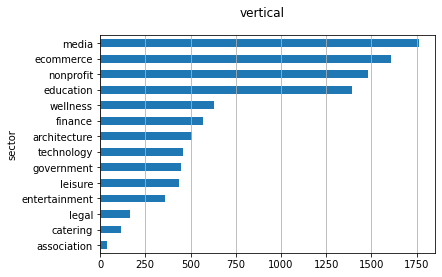

In [13]:
spanish.plot_categories()

In [14]:
spanish.label_encoding()

In [15]:
sector_id_df = spanish.label_encoding_df()
sector_id_df

,sector,sector_cat_id
0,NaN,-1
1,architecture,0
2,association,1
3,catering,2
4,ecommerce,3
5,education,4
6,entertainment,5
7,finance,6
8,government,7
9,legal,8


#### Splitting

In [16]:
# Creating an instance

spanish = VerticalModelTFIDFVectorizer(spanish.language_df, sector_id_df)

In [17]:
print(len(spanish.language_df))
print(len(spanish.test_df))

79675
69705


In [18]:
sector_id_df

,sector,sector_cat_id
0,NaN,-1
1,architecture,0
2,association,1
3,catering,2
4,ecommerce,3
5,education,4
6,entertainment,5
7,finance,6
8,government,7
9,legal,8


In [19]:
print('Feature dimensions: ', spanish.features.ndim)
print('Number of messages: ', spanish.features.shape)

print('Target dimensions: ', spanish.target.ndim)
print('Number of messages: ', spanish.target.shape)

Feature dimensions:  1
Number of messages:  (79675,)
Target dimensions:  1
Number of messages:  (79675,)


Vertical=-1, n=69705 (87.487%)
Vertical=5, n=357 (0.448%)
Vertical=6, n=568 (0.713%)
Vertical=7, n=450 (0.565%)
Vertical=11, n=1482 (1.860%)
Vertical=3, n=1609 (2.019%)
Vertical=10, n=1763 (2.213%)
Vertical=12, n=459 (0.576%)
Vertical=4, n=1392 (1.747%)
Vertical=13, n=629 (0.789%)
Vertical=8, n=165 (0.207%)
Vertical=0, n=506 (0.635%)
Vertical=2, n=117 (0.147%)
Vertical=9, n=434 (0.545%)
Vertical=1, n=39 (0.049%)


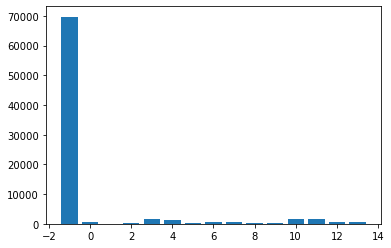

In [20]:
# Observing target distribution

spanish.target_plotter(spanish.target)

In [21]:
features_train, features_test, target_train, target_test = spanish.labeled_unlabeled_partitioner()

In [22]:
print(type(features_train))
print(type(features_test))
print(type(target_train))
print(type(target_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(9970,) (9970,)
(69705,) (69705,)


#### Extracting features from train

In [24]:
# Obtaining the tfidf vectorizer

tfidf_vectorizer = spanish.tfidf_vectorizer()
tfidf_vectorizer

TfidfVectorizer(max_features=10000)

In [25]:
# Training the vectorizer

tfidf_features_train, vectorizer = spanish.tfidf_vectorizer_train(tfidf_vectorizer, features_train)
tfidf_features_train.shape

(9970, 10000)

In [26]:
len(tfidf_vectorizer.vocabulary_)

10000

In [27]:
# SMOTE oversampling

tfidf_features_train, target_train = spanish.target_smotter(tfidf_features_train, target_train)

Vertical=5, n=1763 (7.143%)
Vertical=6, n=1763 (7.143%)
Vertical=7, n=1763 (7.143%)
Vertical=11, n=1763 (7.143%)
Vertical=3, n=1763 (7.143%)
Vertical=10, n=1763 (7.143%)
Vertical=12, n=1763 (7.143%)
Vertical=4, n=1763 (7.143%)
Vertical=13, n=1763 (7.143%)
Vertical=8, n=1763 (7.143%)
Vertical=0, n=1763 (7.143%)
Vertical=2, n=1763 (7.143%)
Vertical=9, n=1763 (7.143%)
Vertical=1, n=1763 (7.143%)


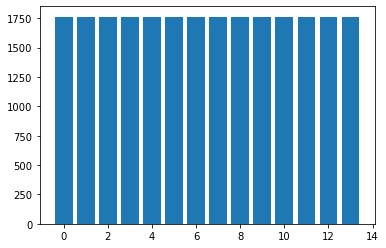

In [28]:
spanish.target_plotter(target_train)

#### Saving the trained vectorizer

In [29]:
spanish.vectorizer_save(tfidf_vectorizer, path="../../../datasets/vectorizers/vertical_model_tfidf_vectorizer_spanish")

#### Converting messages from test into vectors

In [30]:
# Creating an instance

model = MultinomialNBClassifier(features_test, tfidf_vectorizer, tfidf_features_train, target_train)

In [31]:
tfidf_features_test =  model.vectorizer_test()

#### Observing the dimension of the resulting feature vector

In [32]:
print(tfidf_features_train.ndim) # m x n matrix
print(tfidf_features_test.ndim)

print(tfidf_features_train.shape)
print(tfidf_features_test.shape)

2
2
(24682, 10000)
(69705, 10000)


In [33]:
print(f'The dimension of our feature vector is {tfidf_features_train.shape[1]}.')

The dimension of our feature vector is 10000.


Each vector represents the frequency of a word in the predefined dictionary of words:

In [34]:
print(tfidf_features_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
tfidf_features_test

<69705x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 5545123 stored elements in Compressed Sparse Row format>

#### Training & Predict

In [36]:
# Creating an instance

classifier = model.get_multinomial_nb_classifier()
classifier

MultinomialNB()

In [37]:
# Training the model and timing it

%time model.classifier_training(classifier)

CPU times: user 1.63 s, sys: 306 ms, total: 1.93 s
Wall time: 1.41 s


In [38]:
# Saving the trained classifier

model.classifier_save(classifier, path="../../../datasets/classifiers/vertical_model_multinomial_nb_classifier_spanish")

In [39]:
# Predicting Vertical

predictions = model.classifier_predict(classifier, tfidf_features_test)

In [40]:
predictions

array([13,  7,  3, ...,  8,  4,  3], dtype=int8)

In [41]:
print(len(predictions))
print(type(predictions))
print(len(features_test))
print(type(features_test))

69705
<class 'numpy.ndarray'>
69705
<class 'numpy.ndarray'>


#### Merging Predictions with the original messages

In [42]:
spanish_predictions = MergePredicted(predictions, spanish.language_df, spanish.test_df)

In [43]:
spanish_predictions.language_df[['campaign_id', 'sector_cat_id']].head(15)

,campaign_id,sector_cat_id
8,8,5
13,13,6
18,18,7
19,19,5
23,23,11
31,31,3
35,35,10
46,46,5
72,72,11
80,80,3


In [44]:
spanish_predictions.test_df[['campaign_id', 'sector_cat_id']].head(15)

,campaign_id,sector_cat_id
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
5,5,-1
6,7,-1
7,9,-1
8,10,-1
9,11,-1


In [45]:
len(spanish_predictions.language_df)

9970

In [46]:
len(spanish.test_df)

69705

In [47]:
len(predictions)

69705

In [48]:
unique, counts = spanish_predictions.get_predicted_frequency()

[[   0 2281]
 [   1  479]
 [   2 1068]
 [   3 6860]
 [   4 9441]
 [   5 3346]
 [   6 7671]
 [   7 3231]
 [   8 8613]
 [   9 2489]
 [  10 9504]
 [  11 3800]
 [  12 3511]
 [  13 7411]]


In [49]:
results_df = spanish_predictions.merge_predicted()

In [50]:
results_df[['campaign_id', 'sector_cat_id', 'predicted_class']].head(15)

,campaign_id,sector_cat_id,predicted_class
0,0,-1,13
1,1,-1,7
2,2,-1,3
3,3,-1,13
4,4,-1,10
5,5,-1,2
6,7,-1,3
7,9,-1,13
8,10,-1,3
9,11,-1,4


In [51]:
vertical_classified_df = spanish_predictions.get_vertical_classified_df()

In [52]:
vertical_classified_df[['campaign_id', 'vertical']]

,campaign_id,vertical
8,8,5
13,13,6
18,18,7
19,19,5
23,23,11
...,...,...
69700,99991,11
69701,99993,3
69702,99994,8
69703,99997,4


In [53]:
vertical_classified_df.columns

Index(['sender', 'subject', 'date_sent', 'total_sent', 'customer_cat', 'opens',
       'clicks', 'message', 'campaign_id', 'open_rate', 'ctr', 'ctor',
       'clean_subject', 'clean_message', 'vertical'],
      dtype='object')

In [54]:
spanish_predictions.save_final_df(vertical_classified_df, '../../../datasets/output/sample_01/output_08/', 'es.csv')